In [3]:
dir_anno = "/Users/sam.treweek/VOCdevkit/VOC2012/Annotations"
img_dir  = "/Users/sam.treweek/VOCdevkit/VOC2012/JPEGImages"


In [4]:
import os 
import numpy as np
import xml.etree.ElementTree as ET
from collections import OrderedDict
import matplotlib.pyplot as plt
import pandas as pd 

def extract_single_xml_file(tree):
    Nobj = 0
    row  = OrderedDict()
    for elems in tree.iter():

        if elems.tag == "size":
            for elem in elems:
                row[elem.tag] = int(elem.text)
        if elems.tag == "object":
            for elem in elems:
                if elem.tag == "name":
                    row["bbx_{}_{}".format(Nobj,elem.tag)] = str(elem.text)              
                if elem.tag == "bndbox":
                    for k in elem:
                        row["bbx_{}_{}".format(Nobj,k.tag)] = float(k.text)
                    Nobj += 1
    row["Nobj"] = Nobj
    return(row)

df_anno = []
for fnm in os.listdir(dir_anno):  
    if not fnm.startswith('.'): ## do not include hidden folders/files
        tree = ET.parse(os.path.join(dir_anno,fnm))
        row = extract_single_xml_file(tree)
        row["fileID"] = fnm.split(".")[0]
        df_anno.append(row)
df_anno = pd.DataFrame(df_anno)

maxNobj = np.max(df_anno["Nobj"])


print("columns in df_anno\n-----------------")
for icol, colnm in enumerate(df_anno.columns):
    print("{:3.0f}: {}".format(icol,colnm))
print("-"*30)
print("df_anno.shape={}=(N frames, N columns)".format(df_anno.shape))
df_anno.head()

columns in df_anno
-----------------
  0: bbx_0_name
  1: bbx_0_xmax
  2: bbx_0_xmin
  3: bbx_0_ymax
  4: bbx_0_ymin
  5: depth
  6: height
  7: width
  8: Nobj
  9: fileID
 10: bbx_1_name
 11: bbx_1_xmin
 12: bbx_1_ymin
 13: bbx_1_xmax
 14: bbx_1_ymax
 15: bbx_2_name
 16: bbx_2_xmax
 17: bbx_2_xmin
 18: bbx_2_ymax
 19: bbx_2_ymin
 20: bbx_3_name
 21: bbx_3_xmin
 22: bbx_3_ymin
 23: bbx_3_xmax
 24: bbx_3_ymax
 25: bbx_4_name
 26: bbx_4_xmax
 27: bbx_4_xmin
 28: bbx_4_ymax
 29: bbx_4_ymin
 30: bbx_5_name
 31: bbx_5_xmax
 32: bbx_5_xmin
 33: bbx_5_ymax
 34: bbx_5_ymin
 35: bbx_6_name
 36: bbx_6_xmin
 37: bbx_6_ymin
 38: bbx_6_xmax
 39: bbx_6_ymax
 40: bbx_7_name
 41: bbx_7_xmin
 42: bbx_7_ymin
 43: bbx_7_xmax
 44: bbx_7_ymax
 45: bbx_8_name
 46: bbx_8_xmin
 47: bbx_8_ymin
 48: bbx_8_xmax
 49: bbx_8_ymax
 50: bbx_9_name
 51: bbx_9_xmin
 52: bbx_9_ymin
 53: bbx_9_xmax
 54: bbx_9_ymax
 55: bbx_10_name
 56: bbx_10_xmax
 57: bbx_10_xmin
 58: bbx_10_ymax
 59: bbx_10_ymin
 60: bbx_11_name
 61: 

,bbx_0_name,bbx_0_xmax,bbx_0_xmin,bbx_0_ymax,bbx_0_ymin,depth,height,width,Nobj,fileID,...,bbx_54_name,bbx_54_xmin,bbx_54_ymin,bbx_54_xmax,bbx_54_ymax,bbx_55_name,bbx_55_xmin,bbx_55_ymin,bbx_55_xmax,bbx_55_ymax
0,person,470.0,391.0,315.0,144.0,3,375,500,1,2011_006135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chair,233.0,155.0,411.0,321.0,3,411,500,2,2008_006482,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tvmonitor,121.0,86.0,70.0,34.0,3,111,500,3,2010_005054,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cat,500.0,181.0,375.0,1.0,3,375,500,1,2010_005732,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,person,337.0,220.0,375.0,143.0,3,375,500,2,2011_004044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dir_preprocessed = "/Users/sam.treweek/VOCdevkit/VOC2012"
df_anno.to_csv(os.path.join(dir_preprocessed,"df_anno.csv"),index=False)

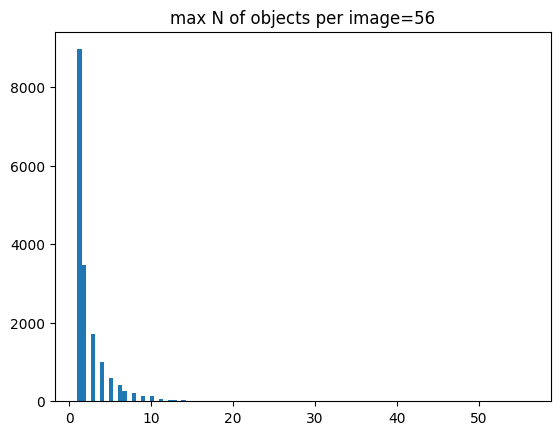

In [6]:
plt.hist(df_anno["Nobj"].values,bins=100)
plt.title("max N of objects per image={}".format(maxNobj))
plt.show()

Counter({'person': 17401, 'chair': 3056, 'car': 2492, 'dog': 1598, 'bottle': 1561, 'cat': 1277, 'bird': 1271, 'pottedplant': 1202, 'sheep': 1084, 'boat': 1059, 'aeroplane': 1002, 'tvmonitor': 893, 'sofa': 841, 'bicycle': 837, 'horse': 803, 'motorbike': 801, 'diningtable': 800, 'cow': 771, 'train': 704, 'bus': 685})


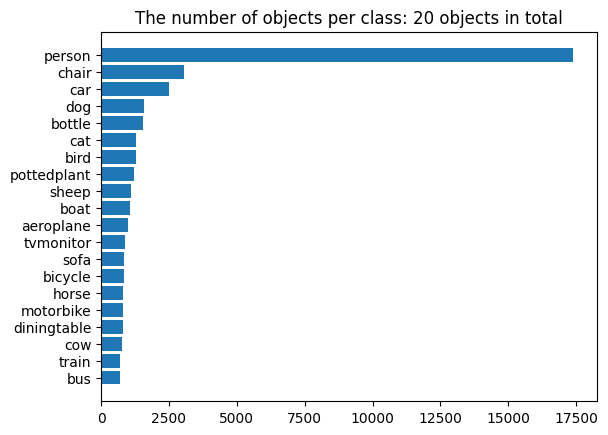

In [7]:
from collections import Counter
class_obj = []
for ibbx in range(maxNobj):
    class_obj.extend(df_anno["bbx_{}_name".format(ibbx)].values)
class_obj = np.array(class_obj)

count             = Counter(class_obj[class_obj != 'nan'])
print(count)
class_nm          = list(count.keys())
class_count       = list(count.values())
asort_class_count = np.argsort(class_count)

class_nm          = np.array(class_nm)[asort_class_count]
class_count       = np.array(class_count)[asort_class_count]

xs = range(len(class_count))
plt.barh(xs,class_count)
plt.yticks(xs,class_nm)
plt.title("The number of objects per class: {} objects in total".format(len(count)))
plt.show()

/Users/sam.treweek/Projects/flerovium/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.


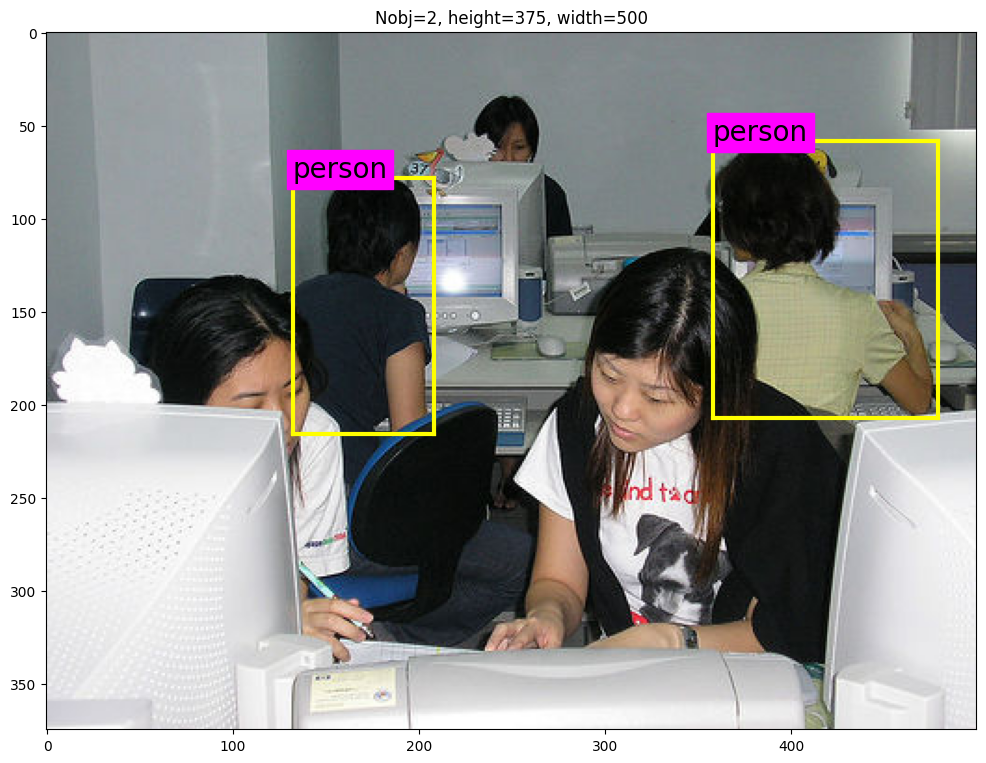

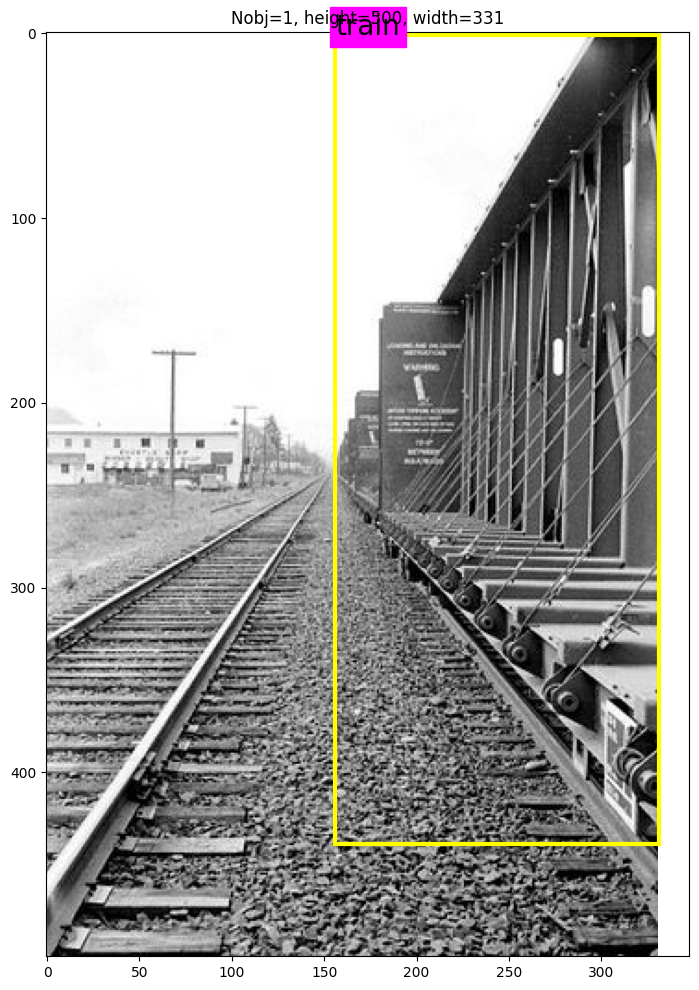

In [9]:
import imageio
def plt_rectangle(plt,label,x1,y1,x2,y2):
    '''
    == Input ==
    
    plt   : matplotlib.pyplot object
    label : string containing the object class name
    x1    : top left corner x coordinate
    y1    : top left corner y coordinate
    x2    : bottom right corner x coordinate
    y2    : bottom right corner y coordinate
    '''
    linewidth = 3
    color = "yellow"
    plt.text(x1,y1,label,fontsize=20,backgroundcolor="magenta")
    plt.plot([x1,x1],[y1,y2], linewidth=linewidth,color=color)
    plt.plot([x2,x2],[y1,y2], linewidth=linewidth,color=color)
    plt.plot([x1,x2],[y1,y1], linewidth=linewidth,color=color)
    plt.plot([x1,x2],[y2,y2], linewidth=linewidth,color=color)
    
# randomly select 20 frames    
size = 2    
ind_random = np.random.randint(0,df_anno.shape[0],size=size)
for irow in ind_random:
    row  = df_anno.iloc[irow,:]
    path = os.path.join(img_dir, row["fileID"] + ".jpg")
    # read in image
    img  = imageio.imread(path)

    plt.figure(figsize=(12,12))
    plt.imshow(img) # plot image
    plt.title("Nobj={}, height={}, width={}".format(row["Nobj"],row["height"],row["width"]))
    # for each object in the image, plot the bounding box
    for iplot in range(row["Nobj"]):
        plt_rectangle(plt,
                      label = row["bbx_{}_name".format(iplot)],
                      x1=row["bbx_{}_xmin".format(iplot)],
                      y1=row["bbx_{}_ymin".format(iplot)],
                      x2=row["bbx_{}_xmax".format(iplot)],
                      y2=row["bbx_{}_ymax".format(iplot)])
    plt.show()